In [11]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator

Found 4711 images belonging to 3 classes.
Found 521 images belonging to 3 classes.
Found 624 images belonging to 3 classes.
{'NORMAL': 0, 'bacteria pneumonia': 1, 'virus pneumonia': 2}


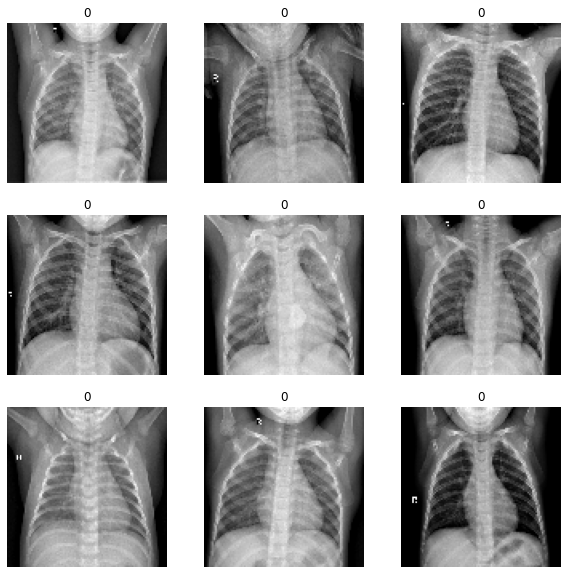

In [12]:
train_path = '/content/drive/MyDrive/deeplearning/final odev/train/'

test_path = '/content/drive/MyDrive/deeplearning/final odev/test/'


train_datagen = ImageDataGenerator (
    rescale = 1./255,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.1
)

# Train verisinde %10 oranında validasyon (doğrulama) ayırıyoruz
val_datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.1)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory (
    train_path,
    target_size = (100,100), 
    shuffle = True,
    class_mode = 'categorical',
    batch_size = 8,
    subset = 'training' 
)

val_generator= val_datagen.flow_from_directory (
    train_path,
    target_size = (100,100),
    shuffle = False,
    class_mode = 'categorical',
    batch_size = 8,
    subset = 'validation'
)


test_generator= test_datagen.flow_from_directory (
    test_path,
    target_size = (100,100),
    shuffle = False,
    class_mode = 'categorical',
    batch_size = 1
)

print(test_generator.class_indices)


plt.figure(figsize=(10,10))

for i in range(9):
  img, y = val_generator.next()
  plt.subplot(3,3,i+1)
  plt.axis('off')
  plt.title(list(y[:195][0]).index(1))
  plt.imshow(img[0])

plt.show()


In [13]:
model = Sequential()
model.add(Flatten(input_shape = (100,100,3))) #vektör hale getiriyotuz
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(3, activation = 'softmax')) # Çıkış katmanı

model.compile(loss = "categorical_crossentropy", optimizer = "Adagrad", metrics = ['accuracy'])

model.summary() #parametre sayısı ve bilgilerine bakıyoruz

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               15360512  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)               

In [15]:
#modelimizi çalıştırıyoruz
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples//32,
    validation_data = val_generator,
    epochs = 20,
    validation_steps = val_generator.samples//32
)

Epoch 1/20
147/147 [==============================] - 16s 112ms/step - loss: 1.0589 - accuracy: 0.4779 - val_loss: 1.5773 - val_accuracy: 0.0000e+00
Epoch 2/20
147/147 [==============================] - 16s 111ms/step - loss: 1.0081 - accuracy: 0.5060 - val_loss: 1.6156 - val_accuracy: 0.0000e+00
Epoch 3/20
147/147 [==============================] - 16s 110ms/step - loss: 0.9626 - accuracy: 0.5638 - val_loss: 1.0118 - val_accuracy: 0.5625
Epoch 4/20
147/147 [==============================] - 16s 111ms/step - loss: 0.9132 - accuracy: 0.5762 - val_loss: 0.6533 - val_accuracy: 0.8750
Epoch 5/20
147/147 [==============================] - 16s 112ms/step - loss: 0.8726 - accuracy: 0.6131 - val_loss: 1.1180 - val_accuracy: 0.5625
Epoch 6/20
147/147 [==============================] - 16s 112ms/step - loss: 0.8601 - accuracy: 0.6170 - val_loss: 0.8934 - val_accuracy: 0.7031
Epoch 7/20
147/147 [==============================] - 16s 111ms/step - loss: 0.8375 - accuracy: 0.6383 - val_loss: 0.3090 

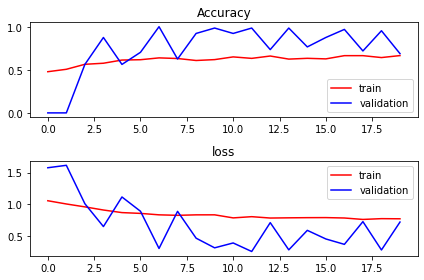

In [16]:
plt.subplot(211)

plt.title("Accuracy")
plt.plot(history.history["accuracy"], color = 'r', label = 'train')
plt.plot(history.history["val_accuracy"], color = 'b', label = 'validation')
plt.legend(loc='best')

plt.subplot(212)

plt.title("loss")
plt.plot(history.history["loss"], color = 'r', label = 'train')
plt.plot(history.history["val_loss"], color = 'b', label = 'validation')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [17]:
score = model.evaluate(val_generator)
print("Val Loss", score[0])
print("Val Accuracy", score[1]*100)

score = model.evaluate(train_generator)
print("Train Loss", score[0])
print("Train Accuracy", score[1]*100)

score = model.evaluate(test_generator)
print("Test Loss", score[0])
print("Test Accuracy", score[1]*100)

66/66 [==============================] - 5s 77ms/step - loss: 0.6317 - accuracy: 0.7390
Val Loss 0.6316860318183899
Val Accuracy 73.89635443687439
589/589 [==============================] - 58s 99ms/step - loss: 0.7395 - accuracy: 0.6644
Train Loss 0.7394745349884033
Train Accuracy 66.44024848937988
624/624 [==============================] - 7s 11ms/step - loss: 0.7348 - accuracy: 0.7035
Test Loss 0.7347707152366638
Test Accuracy 70.35256624221802


In [21]:
scoreSeg = model.evaluate_generator(test_generator,624)
test_generator.reset()
predict = model.predict_generator(test_generator,624)


print('tahmin Değerleri')
print(np.argmax(predict, axis=1))
print('*************************************************************************')

print('Gerçek Değerleri')
print(test_generator.classes)

print(test_generator.class_indices)

pred=np.argmax(predict, axis=1)
print('*************************************************************************')
print("Confusion Matrix")
print(confusion_matrix(test_generator.classes,pred))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


tahmin Değerleri
[0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 2 0 0 2 2 0 0 2 2 1 2 0 1 0 0 2 0 0 0 2 0 0 2 0 2 0 0 2 0 1 2 2 0 0 0 2 0
 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0 0 0 0 0 2 1 1 1 0 0 0 0 0 0 2 0 2 2 0 0 0 0
 0 0 0 0 2 2 0 0 2 2 1 2 1 2 0 2 0 2 1 2 2 2 2 2 0 2 2 0 0 2 0 2 2 1 1 2 1
 2 0 0 0 0 0 0 2 0 0 0 2 2 0 0 2 0 1 2 1 0 0 2 0 0 0 2 0 0 0 0 0 2 2 1 0 2
 0 2 0 0 2 2 2 0 1 2 0 0 0 2 0 2 0 2 0 0 2 0 0 2 2 0 0 0 0 0 0 2 1 2 2 2 2
 2 2 0 0 1 0 2 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 2 2 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 0 2 0
 1 1 2 2

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print("Results")
print(classification_report(test_generator.classes,pred,target_names=(sorted(test_generator.class_indices.keys()))))

from sklearn.metrics import accuracy_score
print ('Accuracy:', accuracy_score(test_generator.classes, np.argmax(predict, axis=1)))

print('Test accuracy :', '%', scoreSeg[1]*100)



Results
                    precision    recall  f1-score   support

            NORMAL       0.89      0.60      0.71       234
bacteria pneumonia       0.75      0.89      0.81       242
   virus pneumonia       0.47      0.57      0.51       148

          accuracy                           0.70       624
         macro avg       0.70      0.68      0.68       624
      weighted avg       0.73      0.70      0.70       624

Accuracy: 0.7035256410256411
Test accuracy : % 70.35256624221802
